In [57]:
!python --version

Python 3.13.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)
# coordinate info of sample sites
geo = pd.read_csv(r"../data/Emma Sumner/field_sorghum_locations.csv")

In [53]:
pd.merge(left=geo, right=sorghum, left_on="soil_sample_ID", right_on="customer_sample_id");

# ___Chemical properties___
-----------------

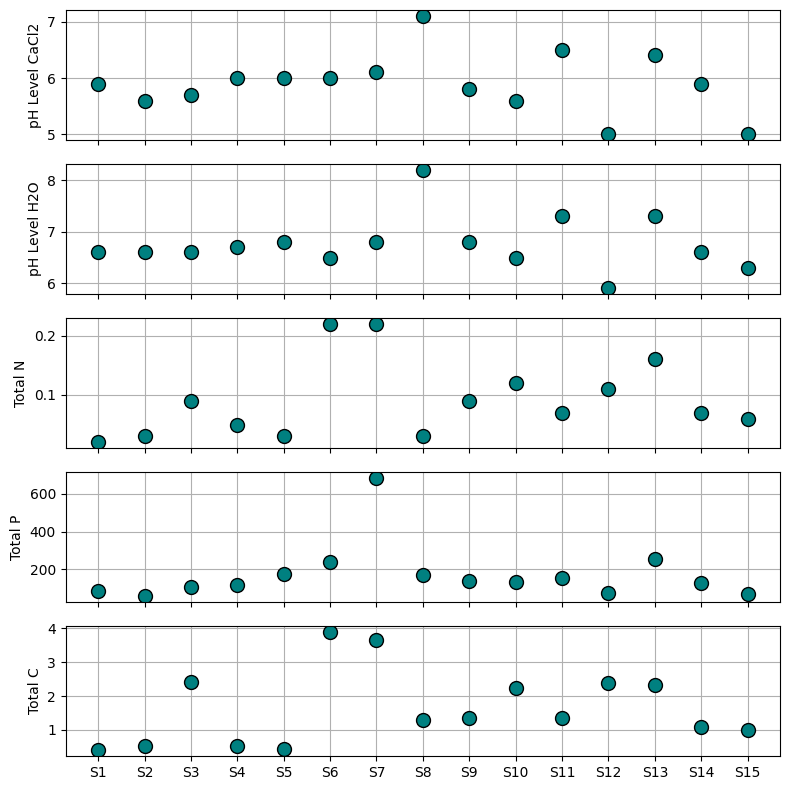

In [8]:
fig, axes = plt.subplots(nrows=5, sharex=True, sharey=False)
fig.set_size_inches(8, 8)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis.set_ylabel(name, loc="center")
    axis.grid()
    
plt.tight_layout()
plt.show()

# ___Soil texture___
--------------

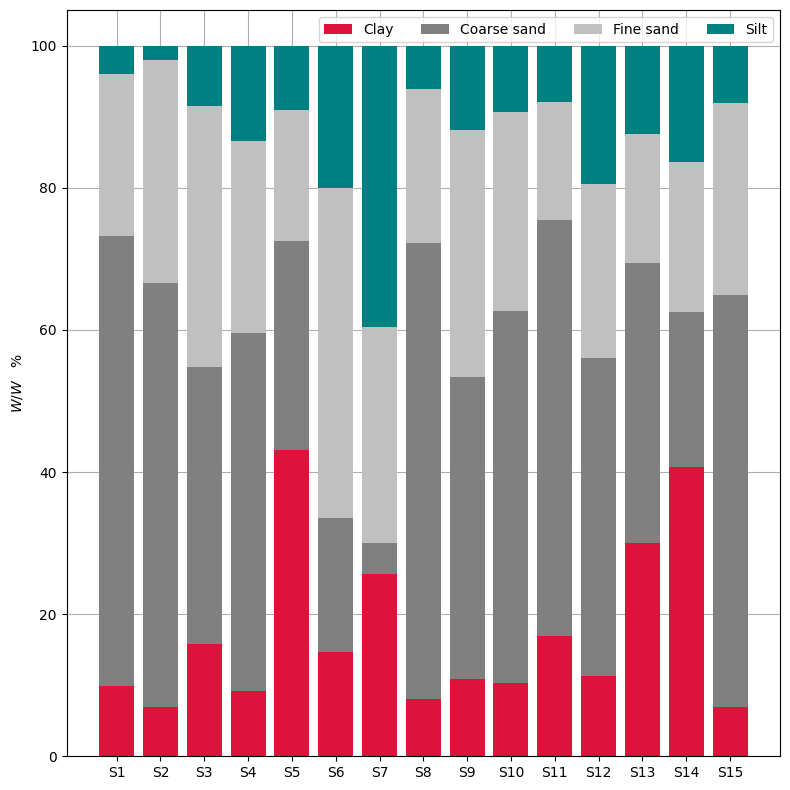

In [10]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_course_sand, bottom=sorghum.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_fine_sand, bottom=sorghum.prcnt_clay+sorghum.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right")
axes.set_ylabel(r"$W/W\hspace{1}\%$")
axes.set_axisbelow(True)
axes.grid()
axes.legend(loc="upper right", ncols=4)
plt.tight_layout()
plt.show()

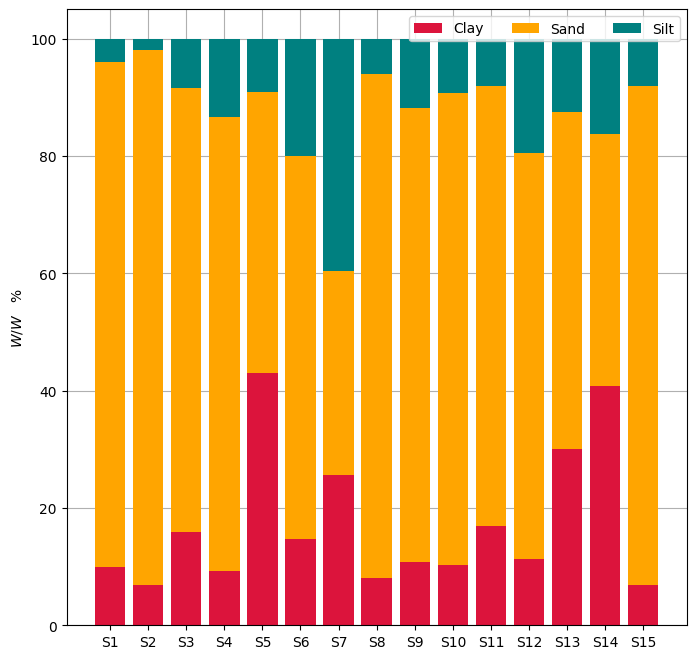

In [13]:
# without differentiating sand into coarse and fine sand
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_sand, bottom=sorghum.prcnt_clay, color="orange", label="Sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right", ncols=3)
axes.set_axisbelow(True)
axes.grid()
axes.set_ylabel(r"$W/W\hspace{1}\%$")
plt.show()

# ___Goegraphics___
-------------

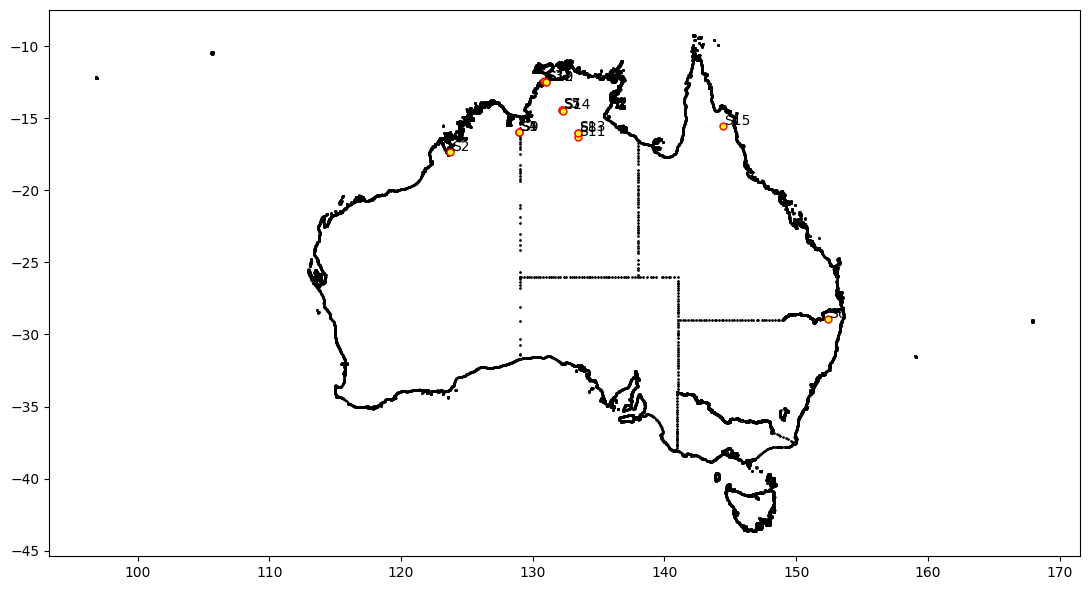

In [54]:
fig, axes = plt.subplots()
fig.set_size_inches(11, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
plt.tight_layout()
plt.show()

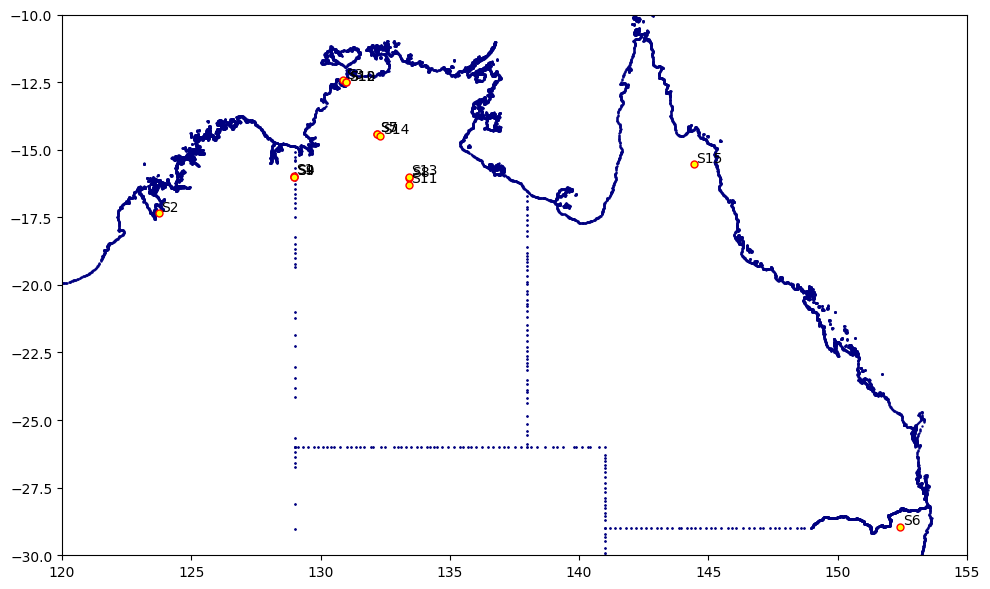

In [56]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
axes.set_ylim(-30, -10)
axes.set_xlim(120, 155)
plt.tight_layout()
plt.show()